# Areas at risk
This is an example of spatial join in which we merge add information about the risk of landslides to a datasets of the municipalities in the Latium region of Italy. We will count the number of landslides that have been detected in each municipality to provide a rough estimation of the risk and we will show a choropleth map with the municipalities colored according to the risk.

In [94]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("geopandas version: %s"%gpd.__version__)

numpy version: 1.23.1
geopandas version: 0.11.1


## Data analysis

We open the dataset of the municipalities in the Latium region

In [10]:
lazio_gdf_tmp = gpd.read_file('data/vector/italy/istat_confini_comuni/lazio/comuni_lazio.shx')
lazio_gdf_tmp.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
0,3,12,58,258,258,58083,058083,Riofreddo,None,0,1.238413e+07,16120.664597,"POLYGON ((832507.251 4666071.875, 832469.313 4..."
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,1.583707e+07,19220.123139,"POLYGON ((831006.885 4655663.966, 831078.822 4..."
2,3,12,58,258,258,58085,058085,Rocca di Cave,None,0,1.108538e+07,14311.900208,"POLYGON ((827052.965 4641862.514, 827092.712 4..."
3,3,12,56,0,56,56014,056014,Capranica,None,0,4.096831e+07,30863.172460,"POLYGON ((757298.401 4687240.264, 757364.463 4..."
4,3,12,56,0,56,56015,056015,Caprarola,None,0,5.757693e+07,41605.105931,"POLYGON ((762244.792 4695086.155, 762262.171 4..."


In [67]:
num_municipalities_latium = len(lazio_gdf_tmp)
print('Number of municipalities in the Latium region: {0:d}'.format(num_municipalities_latium))

Number of municipalities in the Latium region: 378


(690707.8065800004, 930427.8436199996, 4513096.596460001, 4757977.743740001)

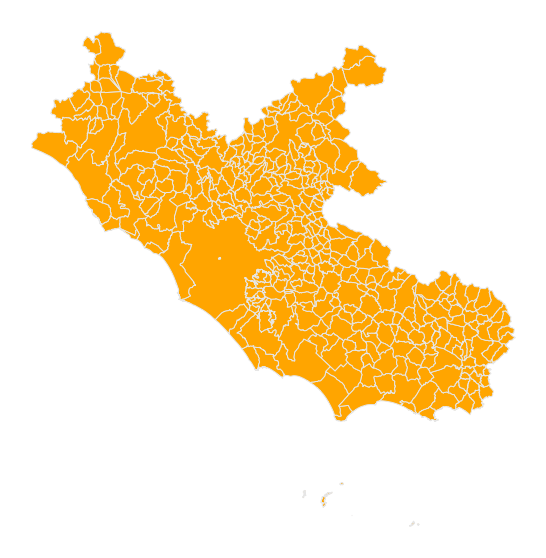

In [30]:
fig, ax = plt.subplots(1, figsize=(15, 10))
lazio_gdf_tmp.plot(color='orange', ax=ax, edgecolor='0.9')
ax.axis('off')

In [21]:
lazio_landslides_gdf_tmp = gpd.read_file('data/vector/italy/landslides/lazio/frane_poly_opendataPolygon.shp')
lazio_landslides_gdf_tmp.head()

,id_frana,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr,geometry
0,0570067500,7,Complesso,12.0,Lazio,57.0,Rieti,57070.0,Torri in Sabina,4,Appennino Centrale,"POLYGON ((799609.508 4695439.461, 799604.138 4..."
1,0570075600,4,Colamento lento,12.0,Lazio,57.0,Rieti,57048.0,Paganico Sabino,4,Appennino Centrale,"POLYGON ((829738.629 4678789.641, 829722.076 4..."
2,0580073500,5,Colamento rapido,12.0,Lazio,58.0,Roma,58085.0,Rocca di Cave,5,Appennino Meridionale,"POLYGON ((826799.137 4639024.047, 826867.931 4..."
3,0600276700,4,Colamento lento,12.0,Lazio,60.0,Frosinone,60031.0,Esperia,5,Appennino Meridionale,"POLYGON ((883939.040 4592590.763, 883963.942 4..."
4,0600514900,1,Crollo/Ribaltamento,12.0,Lazio,60.0,Frosinone,60077.0,Terelle,5,Appennino Meridionale,"POLYGON ((897682.567 4611251.662, 897688.147 4..."


(701105.0195370268, 929485.0405167082, 4522434.408103891, 4756777.940786056)

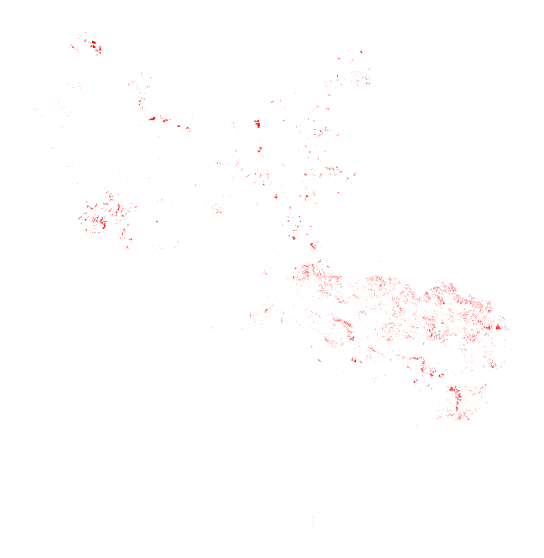

In [29]:
fig, ax = plt.subplots(1, figsize=(15, 10))
lazio_landslides_gdf_tmp.plot(facecolor='red', ax=ax)
ax.axis('off')

In [37]:
lazio_landslides_gdf_tmp[lazio_landslides_gdf_tmp['nome_com'] == 'Roma']

,id_frana,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr,geometry
321,0580078400,4,Colamento lento,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((772848.452 4657296.030, 772858.962 4..."
2242,0580076400,4,Colamento lento,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((772199.438 4646961.091, 772218.683 4..."
2446,0580653000,2,Scivolamento rotazionale/traslativo,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((787539.699 4642425.879, 787573.049 4..."
2562,0580079000,4,Colamento lento,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((772291.966 4667489.253, 772278.319 4..."
3086,0580038600,2,Scivolamento rotazionale/traslativo,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((785864.801 4645776.342, 785876.569 4..."
3552,0580077600,7,Complesso,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((773344.868 4653298.414, 773354.844 4..."
5714,0580077000,2,Scivolamento rotazionale/traslativo,12.0,Lazio,58.0,Roma,58091.0,Roma,4,Appennino Centrale,"POLYGON ((774754.239 4655783.209, 774827.021 4..."


In [66]:
landslides_per_mun = lazio_landslides_gdf_tmp.groupby('nome_com').count()
#landslides_per_mun.loc['Roma']
num_landslides = landslides_per_mun['id_frana']
num_landslides.head()

nome_com
Accumoli         17
Acquafondata      1
Acquapendente    52
Acuto             3
Affile            5
Name: id_frana, dtype: int64

In [83]:
tot_num_landslides_latium = sum(num_landslides)
print('Total number of landslides in the Latium region: {0:d}'.format(tot_num_landslides_latium))

Total number of landslides in the Latium region: 5953


In [69]:
num_municipalities_at_risk_latium = len(num_landslides)
print('Number of municipalities at risk of landslides in the Latium region: {0:d}'.format(num_municipalities_at_risk_latium))

Number of municipalities at risk of landslides in the Latium region: 291


In [76]:
ratio = (num_municipalities_at_risk_latium / num_municipalities_latium) * 100
print('Percentage of municipalities at risk of landslides in the Latium region: {0:.1f} %'.format(ratio))

Percentage of municipalities at risk of landslides in the Latium region: 77.0 %


## Merge

In [100]:
municipalities_at_risk_latium = list(num_landslides.index)
municipalities_at_risk_latium_df = pd.DataFrame({ 'COMUNE': municipalities_at_risk_latium, 'NUM_LANDSLIDES': num_landslides.values })
municipalities_at_risk_latium_df.head()

,COMUNE,NUM_LANDSLIDES
0,Accumoli,17
1,Acquafondata,1
2,Acquapendente,52
3,Acuto,3
4,Affile,5


In [108]:
merged_df = lazio_gdf_tmp.merge(municipalities_at_risk_latium_df, left_on=['COMUNE'], right_on=['COMUNE'])
merged_df.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry,NUM_LANDSLIDES
0,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,1.583707e+07,19220.123139,"POLYGON ((831006.885 4655663.966, 831078.822 4...",21
1,3,12,58,258,258,58085,058085,Rocca di Cave,None,0,1.108538e+07,14311.900208,"POLYGON ((827052.965 4641862.514, 827092.712 4...",22
2,3,12,56,0,56,56014,056014,Capranica,None,0,4.096831e+07,30863.172460,"POLYGON ((757298.401 4687240.264, 757364.463 4...",6
3,3,12,56,0,56,56015,056015,Caprarola,None,0,5.757693e+07,41605.105931,"POLYGON ((762244.792 4695086.155, 762262.171 4...",3
4,3,12,58,258,258,58091,058091,Roma,None,1,1.287241e+09,332693.304311,"MULTIPOLYGON (((770434.487 4625676.636, 770419...",7


(690707.8065800004, 930427.8436199996, 4518069.38071, 4757740.944490001)

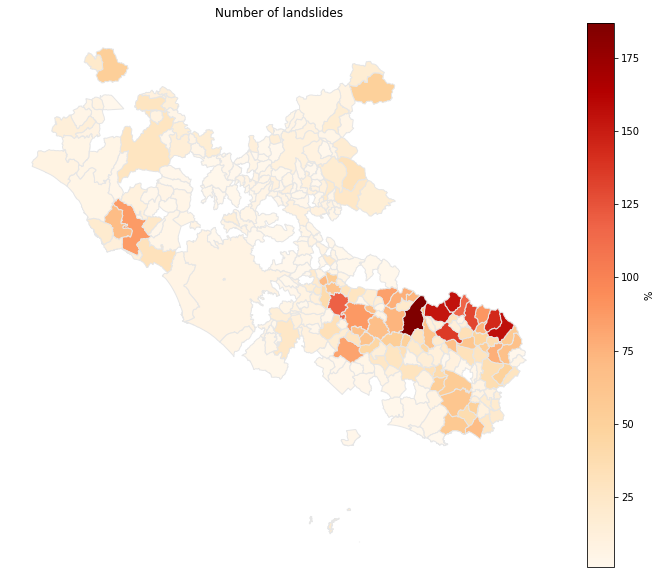

In [110]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('Number of landslides')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
merged_df.plot(column='NUM_LANDSLIDES', cmap='OrRd', linewidth=1, ax=ax, cax=cax, edgecolor='0.9', 
            legend = True, legend_kwds={'label': '%'})
ax.axis('off')

## Spatial join

In [79]:
inner_join = lazio_gdf_tmp.sjoin(lazio_landslides_gdf_tmp, how="inner")
inner_join.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,...,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,4,Colamento lento,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
181,3,12,58,258,258,58027,058027,Cerreto Laziale,None,0,...,4,Colamento lento,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,5,Colamento rapido,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,7,Complesso,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,7,Complesso,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale


In [81]:
len(inner_join)

6364

In [111]:
inner_join.groupby('nome_com').count()['id_frana']

nome_com
Accumoli               18
Acquafondata            1
Acquapendente          53
Acuto                   4
Affile                  6
                       ..
Villa Santo Stefano    11
Viterbo                29
Viticuso                4
Vitorchiano             4
Zagarolo                4
Name: id_frana, Length: 291, dtype: int64

## SQL query
TDB